# Experiments 1-3


### Dataset:
- **Dataset:** 3.5m | 90º
- **Sizes:** small & mid
- **Split:** 240 px
- **Tags:** 5472 `plant-weed`
- **Train/Valid dist:** 66,6% / 33,3%

### Model:
- **Model:** `yolov8n` *(Nano)*
- **Epochs:** 100
- **Batch:** 64
- **Freeze:** 10

### Experiments:
1. small + mid
2. small
3. mid

In [18]:
# CONFIG FOLDER PATH

# Get the project root directory (replace with your actual path)
project_root = "../../"

# The folder you want to navigate to (relative to the root)
target_folder = "docs/Experimentos/2 Finetuning/1 set/runs/detect/"

### Init

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

In [ ]:
# Construct the full path
target_path = os.path.join(project_root, target_folder)

# Change the current working directory
try:
    os.chdir(target_path)
    print(f"Current working directory: {os.getcwd()}")  # Verify
except FileNotFoundError:
    print(f"Error: Folder '{target_path}' not found. Check the path.")
except NotADirectoryError:
    print(f"Error: '{target_path}' is not a directory.")
except Exception as e:
    print(f"An error occurred: {e}")

Current working directory: /Users/alejandrolloveras/Documents/ESTUDIO/UBA/Trabajo Final/Desarrollo/docs/Experimentos/2 Finetuning/1 set/runs/detect


In [16]:
# Reset to the root path
# os.chdir(project_root)
# print(f"Current working directory: {os.getcwd()}") #Verify

In [38]:
def graph_training_metrics(df):
    # Configurar el tamaño de las figuras
    plt.figure(figsize=(15, 6))

    # Graficar pérdidas de entrenamiento y validación
    plt.subplot(1, 2, 1)
    plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
    plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
    plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
    plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
    plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle="dashed")
    plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()

    # Graficar métricas de validación
    plt.subplot(1, 2, 2)
    plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
    plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
    plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
    plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
    plt.xlabel("Epoch")
    plt.ylabel("Metric Score")
    plt.title("Validation Metrics")
    plt.legend()

    plt.tight_layout()
    plt.show()

----

# Experiment 1 *(full dataset)*
### *3.5m | 90º | small + mid*

In [50]:
# Ruta del archivo
file_path = "train/results.csv"

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df1 = pd.read_csv(file_path)
df1.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,17.2895,2.86264,3.29884,1.95424,0.01279,0.68928,0.02569,0.00848,2.63378,2.99687,1.74110,0.000440,0.000440,0.000440
1,2,28.4867,2.61513,2.04811,1.64211,0.23572,0.16222,0.11440,0.02960,2.67724,2.40015,1.79242,0.000891,0.000891,0.000891
2,3,38.9472,2.54296,1.87074,1.62431,0.29896,0.33227,0.18466,0.05243,2.66147,2.13828,1.75992,0.001333,0.001333,0.001333
3,4,50.2162,2.50934,1.83140,1.62503,0.26415,0.29065,0.17140,0.04735,2.76667,2.26624,1.91974,0.001766,0.001766,0.001766
4,5,61.2734,2.47957,1.76947,1.61986,0.25791,0.32027,0.19343,0.05221,2.69983,1.89460,1.86474,0.001921,0.001921,0.001921


In [60]:
last_row = df1.iloc[-1]
time = last_row['time']
print(f"Training time: {time} sec")

Training time: 1075.66 sec


### Graphs

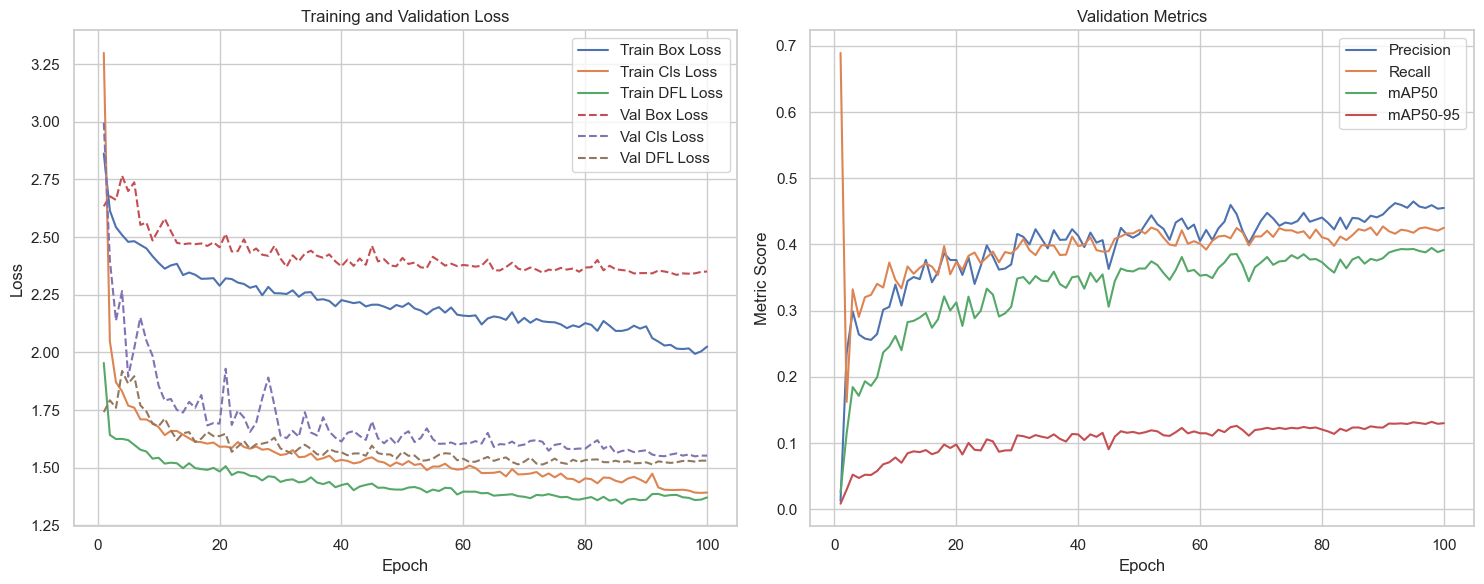

In [39]:
graph_training_metrics(df1)

**1. Pérdidas de entrenamiento y validación:**
- Se observa una tendencia decreciente en las pérdidas de entrenamiento (train/box_loss, train/cls_loss, train/dfl_loss), lo que indica que el modelo está aprendiendo.
- Las pérdidas de validación (val/box_loss, val/cls_loss, val/dfl_loss) también tienden a disminuir, aunque hay cierta variabilidad.

**2. Métricas de validación:**
- La precisión y el recall muestran una mejora en las primeras épocas, pero luego pueden estabilizarse o fluctuar.
- La métrica mAP50 y mAP50-95 aumentan con el tiempo, lo que sugiere una mejora en la capacidad del modelo para hacer predicciones correctas

Las métricas mAP50 y mAP50-95 en este contexto suelen referirse al conjunto de validación (val set), ya que el cálculo del Mean Average Precision (mAP) generalmente se realiza sobre datos no vistos para evaluar el rendimiento real del modelo.

En los registros de entrenamiento, típicamente:

- Las pérdidas (train/box_loss, train/cls_loss, etc.) se calculan sobre el conjunto de entrenamiento.
- Las métricas (metrics/precision(B), metrics/recall(B), metrics/mAP50(B), etc.) se calculan sobre el conjunto de validación.
- Las pérdidas de validación (val/box_loss, val/cls_loss, etc.) también reflejan el rendimiento en el conjunto de validación.

From the F1 curve, the confidence value that optimizes precision and recall is 0.231. In many cases a higher confidence value is desirable.

### Conclusiones

**1️. La pérdida y la métrica evalúan cosas diferentes**

- **La pérdida (Loss)** mide el error a nivel de predicción individual (por ejemplo, diferencias en coordenadas de bounding boxes y clasificación).  
- **El mAP (Mean Average Precision)** mide el rendimiento del modelo en términos de detección correcta (basado en IoU y umbrales de confianza).  
- Es posible que la pérdida no baje significativamente, pero el modelo se vuelva mejor en hacer predicciones útiles desde el punto de vista de la métrica de evaluación.  

**2️. El modelo mejora en precisión sin mejorar mucho en pérdida**

- A veces, el modelo aprende a hacer predicciones más consistentes sin que la pérdida baje notablemente.  
- Esto puede ocurrir si el modelo ya encontró una solución razonablemente buena y mejora en aspectos como la **confianza en las predicciones** o el **ajuste de umbrales de decisión**.  

**3️. El loss puede estar en una meseta (*plateau*)**  

- Es común que la pérdida se estanque en ciertos momentos del entrenamiento, incluso cuando el rendimiento del modelo sigue mejorando.  
- Esto puede indicar que el modelo está cerca de un óptimo y que ajustar hiperparámetros como la tasa de aprendizaje podría ayudar a seguir mejorando.  

**4️. Regularización y *trade-offs* en la función de pérdida**  

- Algunas funciones de pérdida están diseñadas para penalizar ciertas características del modelo, como la confianza excesiva en ciertas clases.  
- Si el modelo mejora en términos de **precisión y recall** sin cambiar mucho en la función de pérdida, podría significar que está **mejorando la distribución de sus predicciones sin reducir su error absoluto**.  

**¿Qué hacer para analizarlo mejor?** 

Si quieres entender más a fondo el comportamiento, podríamos:  
1. Analizar la distribución de **confianza en las predicciones** para ver si el modelo está ajustando mejor sus probabilidades.  
2. Revisar si el **IoU promedio** de los bounding boxes mejora, incluso si la pérdida no cambia mucho.  
3. Probar con una **tasa de aprendizaje más baja** para ver si la pérdida vuelve a disminuir.  

----

# Experiment 2 *(small weed)*
### *3.5m | 90º | small*

In [49]:
# Ruta del archivo
file_path = "train2/results.csv"

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df2 = pd.read_csv(file_path)
df2.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,11.9486,2.16634,1.42909,1.31557,0.50772,0.44162,0.42967,0.13545,2.36404,1.53456,1.41486,0.000340,0.000340,0.000340
1,2,20.8119,2.13819,1.40386,1.28829,0.46923,0.43107,0.39995,0.13243,2.39713,1.50820,1.41965,0.000693,0.000693,0.000693
2,3,29.3795,2.15365,1.42473,1.29339,0.48093,0.43497,0.40858,0.12766,2.39223,1.59771,1.42310,0.001039,0.001039,0.001039
3,4,38.7384,2.21100,1.45759,1.31257,0.44330,0.43255,0.38208,0.12253,2.43516,1.54985,1.44773,0.001378,0.001378,0.001378
4,5,45.4232,2.20057,1.43461,1.31908,0.44217,0.41440,0.37484,0.12190,2.42373,1.54658,1.43874,0.001710,0.001710,0.001710


In [22]:
last_row = df2.iloc[-1]
time = last_row['time']
print(f"Training time: {time} sec")

Training time: 735.773 sec


### Graphs

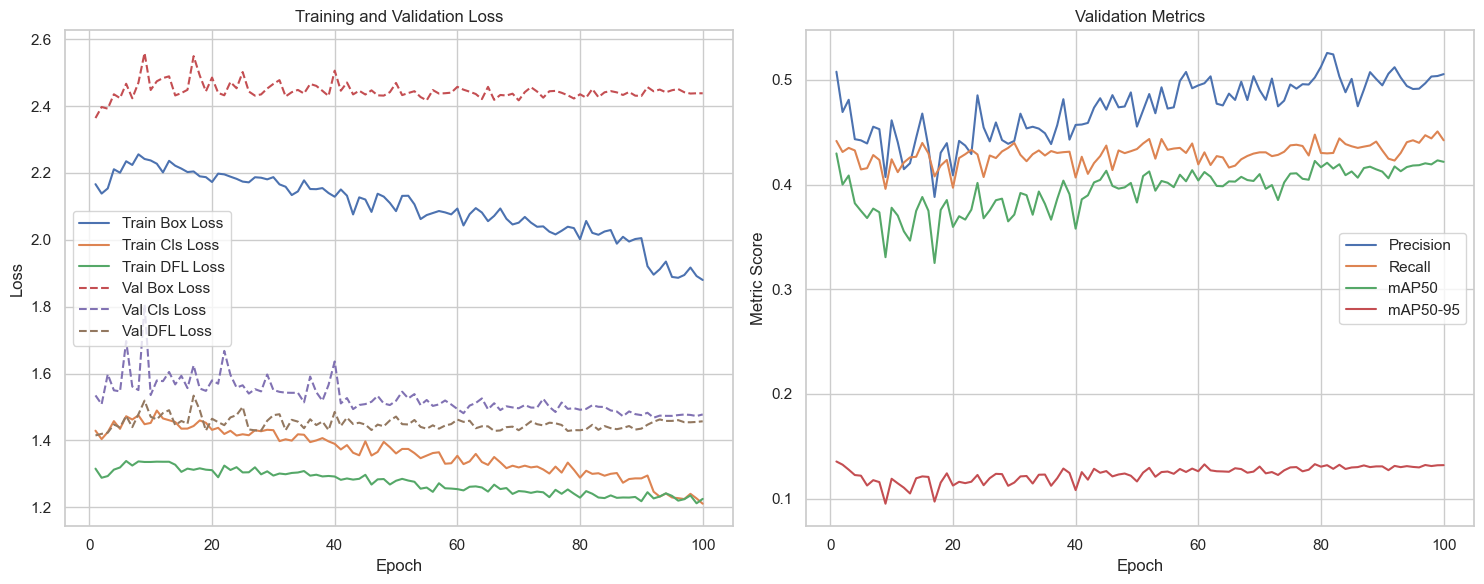

In [40]:
graph_training_metrics(df2)

### Conclusiones

### **1. Pérdidas de Entrenamiento y Validación**

- **La pérdida de entrenamiento (`train/box_loss`) disminuye** con el número de épocas, lo que indica que el modelo está aprendiendo.
- **La pérdida de validación (`val/box_loss`) no muestra una reducción clara** y parece mantenerse o incluso aumentar ligeramente. Esto podría indicar **posible sobreajuste** (overfitting), donde el modelo mejora en los datos de entrenamiento pero no en validación.

### **2. Métricas de Desempeño (Precisión, Recall y mAP)**

- **La precisión (`metrics/precision(B)`) y el recall (`metrics/recall(B)`) no mejoran significativamente** a lo largo de las épocas y parecen incluso fluctuar.
- **El mAP50 (`metrics/mAP50(B)`) y el mAP50-95 (`metrics/mAP50-95(B)`) muestran una tendencia estable o con ligera caída**, lo cual sugiere que el modelo no está generalizando bien.
- Un **bajo mAP50-95 indica que el modelo tiene problemas con objetos de diferentes escalas o condiciones**.

### **3. Posibles Mejoras y Recomendaciones**

- **Revisar si el modelo está sobreajustado**: Si la pérdida de validación deja de mejorar o empeora, es posible que el modelo esté memorizando los datos de entrenamiento. Se puede probar con **regularización (Dropout, L2), más datos o técnicas de data augmentation**.
- **Ajustar la tasa de aprendizaje (`lr/pg0`)**: Si es demasiado alta, el modelo podría no estar convergiendo bien; si es muy baja, puede que no esté aprendiendo lo suficiente. Un **gráfico de la tasa de aprendizaje versus la pérdida** ayudaría a verificar esto.
- **Revisar los datos de entrenamiento**: Si la precisión y recall no mejoran, podría haber un problema con el etiquetado de los datos o con el dataset en general.
- **Experimentar con más épocas** o ajustar el tamaño del batch y la optimización.

----

# Experiment 3 *(medium weed)*
### *3.5m | 90º | mid*

In [23]:
# Ruta del archivo
file_path = "train3/results.csv"

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df3 = pd.read_csv(file_path)
df3.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,7.45131,2.30010,1.76285,1.55897,0.35309,0.37063,0.29439,0.09324,2.41750,1.73619,1.70641,0.000100,0.000100,0.000100
1,2,11.32530,2.17290,1.65964,1.48705,0.44801,0.42616,0.38384,0.13055,2.24468,1.66612,1.64295,0.000218,0.000218,0.000218
2,3,17.89220,2.09069,1.54614,1.48614,0.42080,0.42986,0.36532,0.12693,2.24151,1.78846,1.66976,0.000333,0.000333,0.000333
3,4,21.29600,2.07441,1.50957,1.47628,0.39474,0.43439,0.35794,0.12197,2.24909,1.87155,1.65046,0.000446,0.000446,0.000446
4,5,24.85160,2.11613,1.47965,1.46611,0.41036,0.41999,0.36904,0.12656,2.27029,1.75931,1.63135,0.000557,0.000557,0.000557


In [24]:
last_row = df3.iloc[-1]
time = last_row['time']
print(f"Training time: {time} sec")

Training time: 383.111 sec


### Graphs

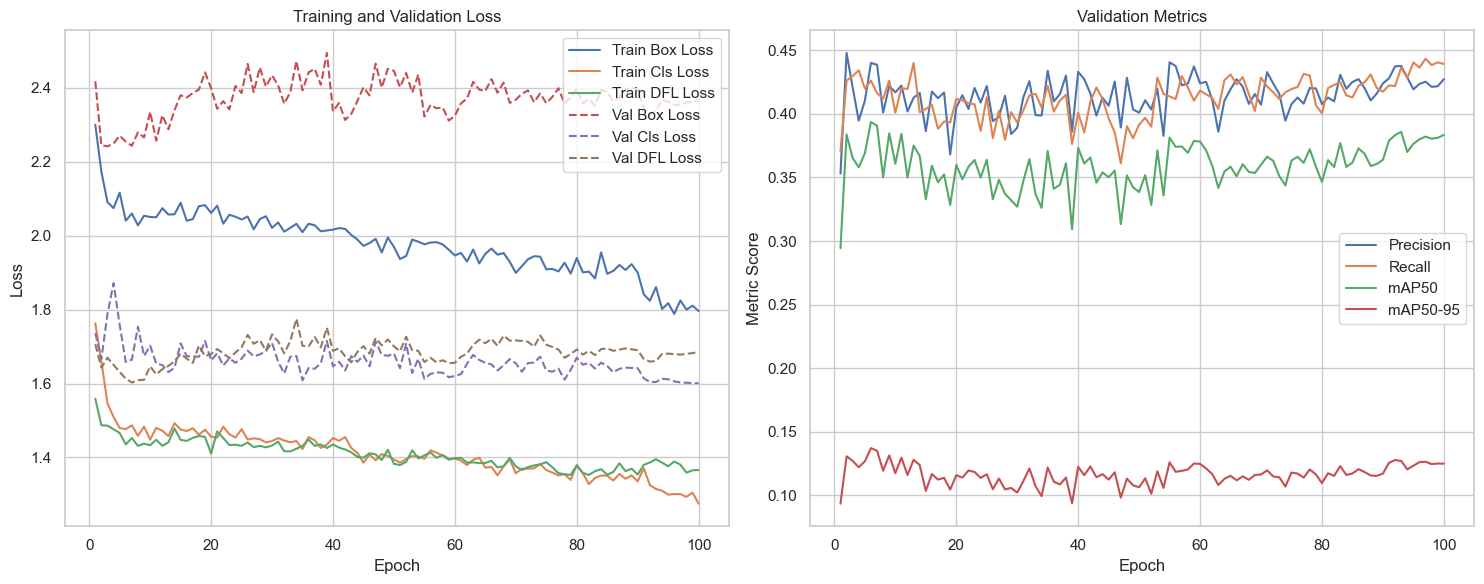

In [41]:
graph_training_metrics(df3)

### Conclusiones

### 1. Evolución de las Pérdidas (Losses)

*   Train Box Loss disminuye, indicando que el modelo está mejorando en la detección de cajas.
*   Train Cls Loss también baja, lo que sugiere mejor clasificación.
*   Val Box Loss y Val Cls Loss siguen una tendencia similar, pero si en algún punto aumentan, podría haber sobreajuste (overfitting).
*   DFL Loss también disminuye, lo que es positivo para la precisión de las cajas.

**Si las pérdidas de validación dejan de mejorar mientras las de entrenamiento siguen bajando, el modelo podría estar memorizando el dataset en lugar de generalizar bien.**

---

### 2. Evaluación de Métricas (Precisión, Recall, mAP)

*   Precision y Recall aumentan con las épocas. Sin embargo:
    *   Si la precisión sube mientras el recall baja, el modelo podría estar siendo muy conservador en sus detecciones.
*   mAP50 (Mean Average Precision con IoU=0.5) y mAP50-95 reflejan mejoras, pero si dejan de aumentar, el aprendizaje se ha estancado.
*   Un mAP50-95 bajo indica problemas con el ajuste de los bounding boxes o insuficiente variedad en los datos de entrenamiento.

**Si las métricas fluctúan sin mejorar, el modelo podría necesitar más datos o ajustes en la tasa de aprendizaje.**

---

### 3. Comportamiento de la Tasa de Aprendizaje (LR)

*   La tasa de aprendizaje aumenta gradualmente.
*   Si las métricas de validación comienzan a deteriorarse, la tasa de aprendizaje podría ser demasiado alta.

**Un LR muy alto puede hacer que el modelo oscile sin converger. Un LR muy bajo puede ralentizar el aprendizaje.**

---

### Posibles Mejoras

*   **Evitar el sobreajuste:** Regularización (Dropout, Data Augmentation) o early stopping.
*   **Optimización de la tasa de aprendizaje:** Ajustar LR si las métricas dejan de mejorar.
*   **Más datos de entrenamiento:** Si el mAP es bajo, ampliar el dataset o aplicar Data Augmentation.


----

# Conclusiones generales

## Graphs

### Training and Validation Losses

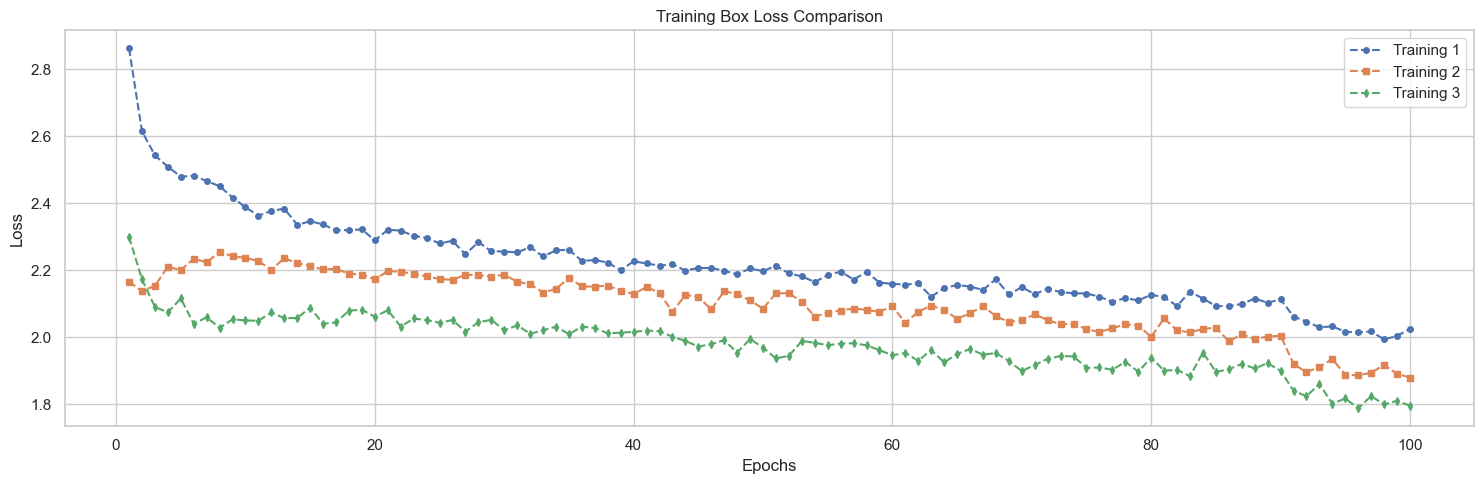

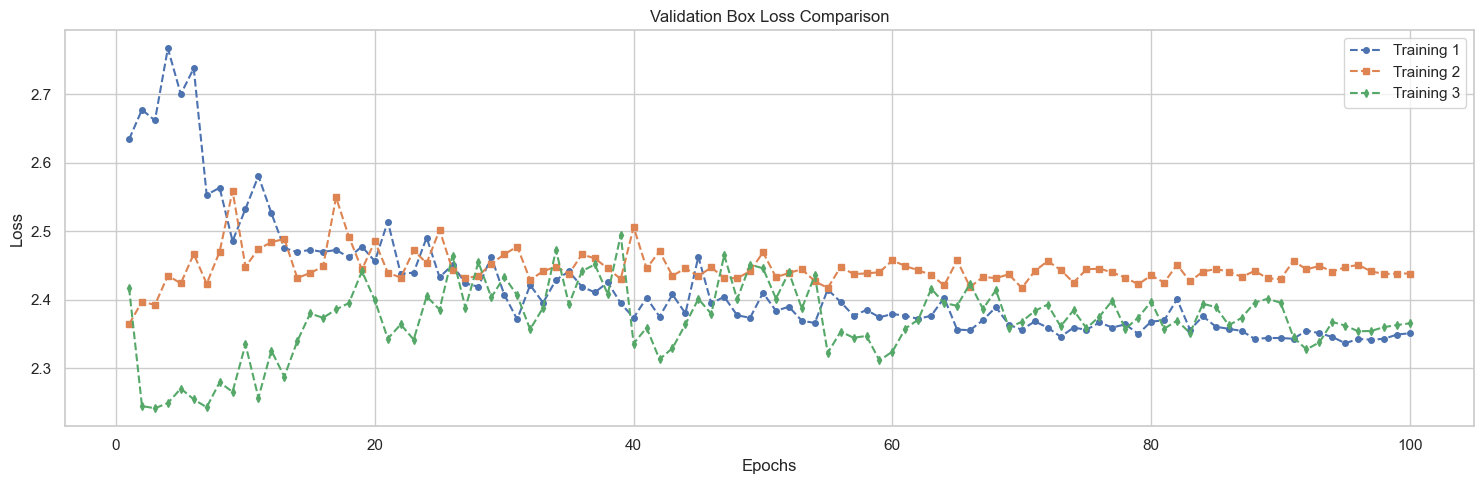

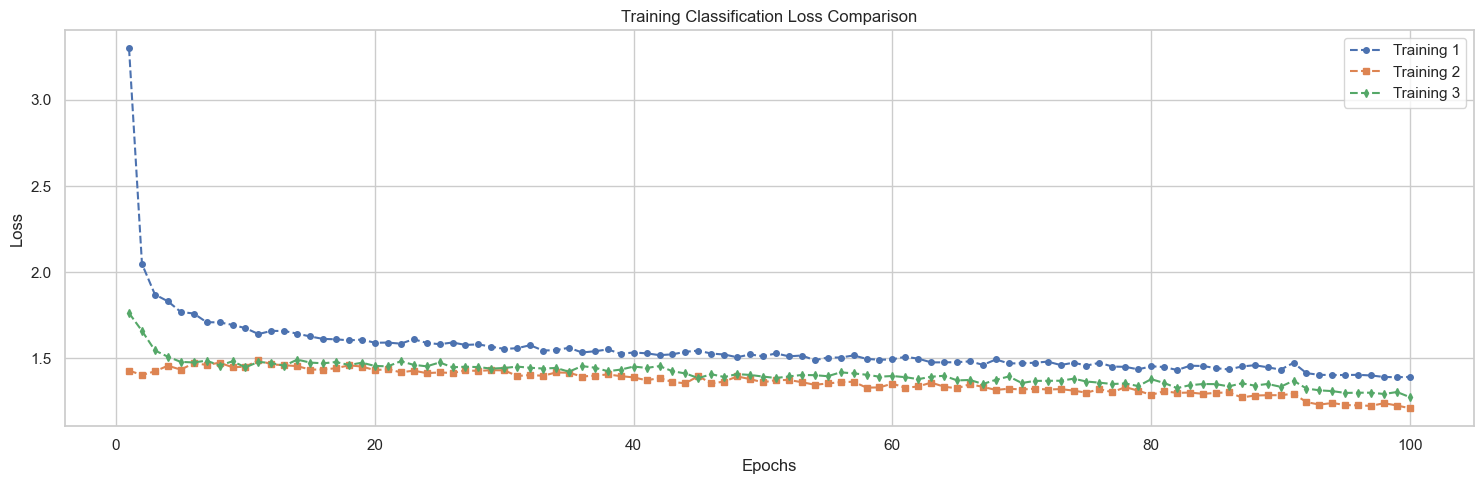

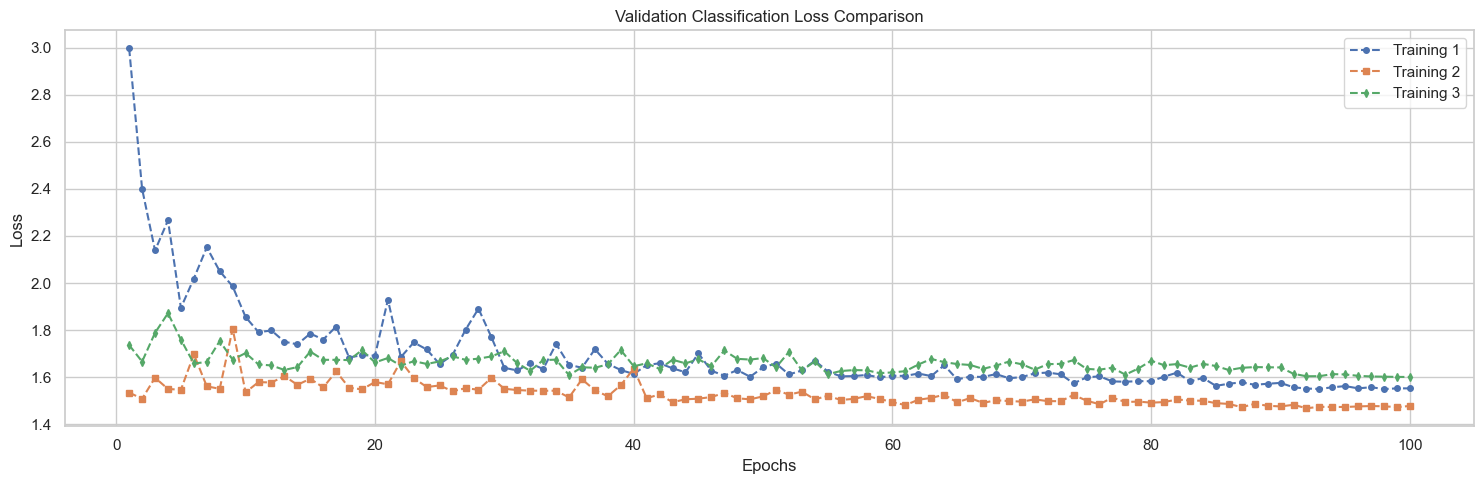

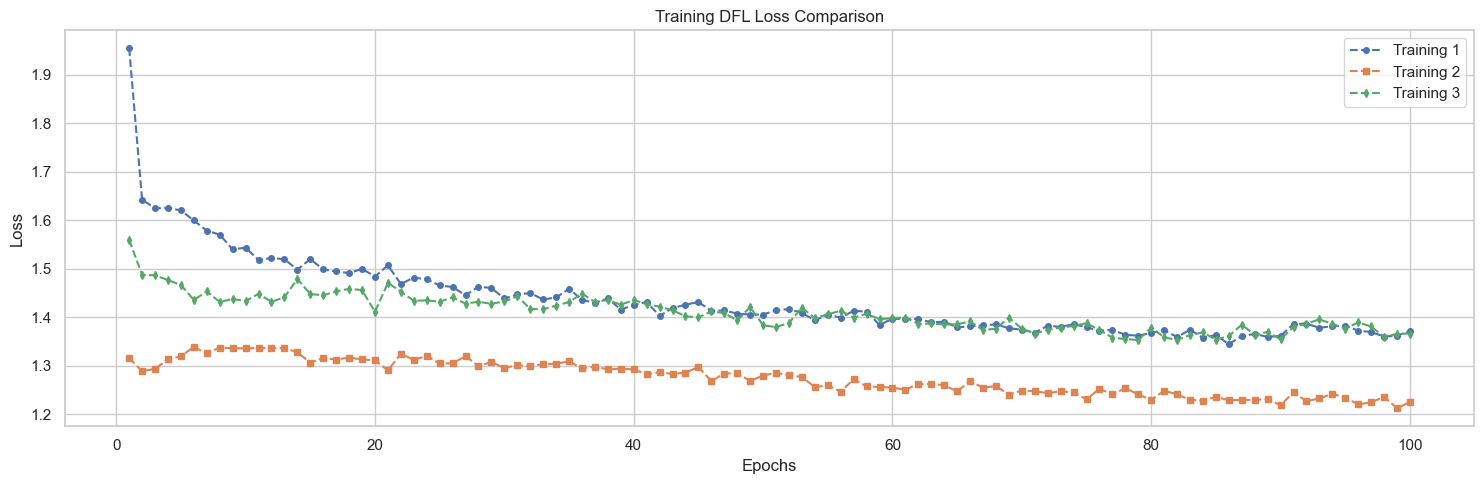

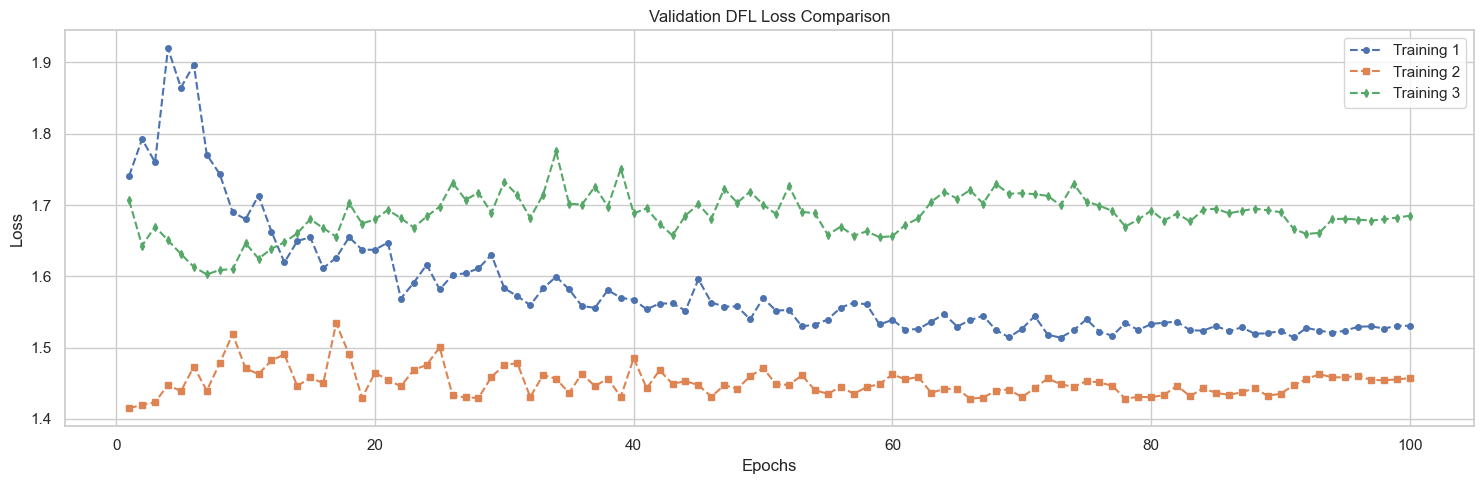

In [27]:
# Define function to plot metrics
def plot_metric(metric, ylabel, title):
    plt.figure(figsize=(15, 5))
    plt.plot(df1["epoch"], df1[metric], label="Training 1", linestyle="--", marker="o", markersize=4)
    plt.plot(df2["epoch"], df2[metric], label="Training 2", linestyle="--", marker="s", markersize=4)
    plt.plot(df3["epoch"], df3[metric], label="Training 3", linestyle="--", marker="d", markersize=4)
    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot Training and Validation Losses
plot_metric("train/box_loss", "Loss", "Training Box Loss Comparison")
plot_metric("val/box_loss", "Loss", "Validation Box Loss Comparison")

plot_metric("train/cls_loss", "Loss", "Training Classification Loss Comparison")
plot_metric("val/cls_loss", "Loss", "Validation Classification Loss Comparison")

plot_metric("train/dfl_loss", "Loss", "Training DFL Loss Comparison")
plot_metric("val/dfl_loss", "Loss", "Validation DFL Loss Comparison")

### Performance Metrics

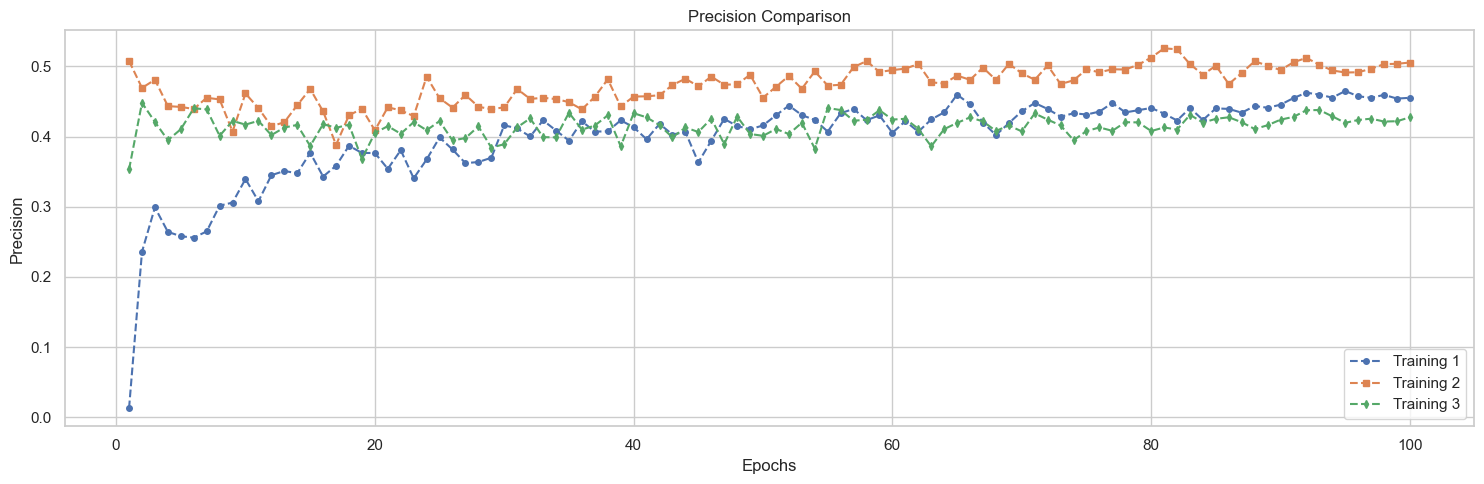

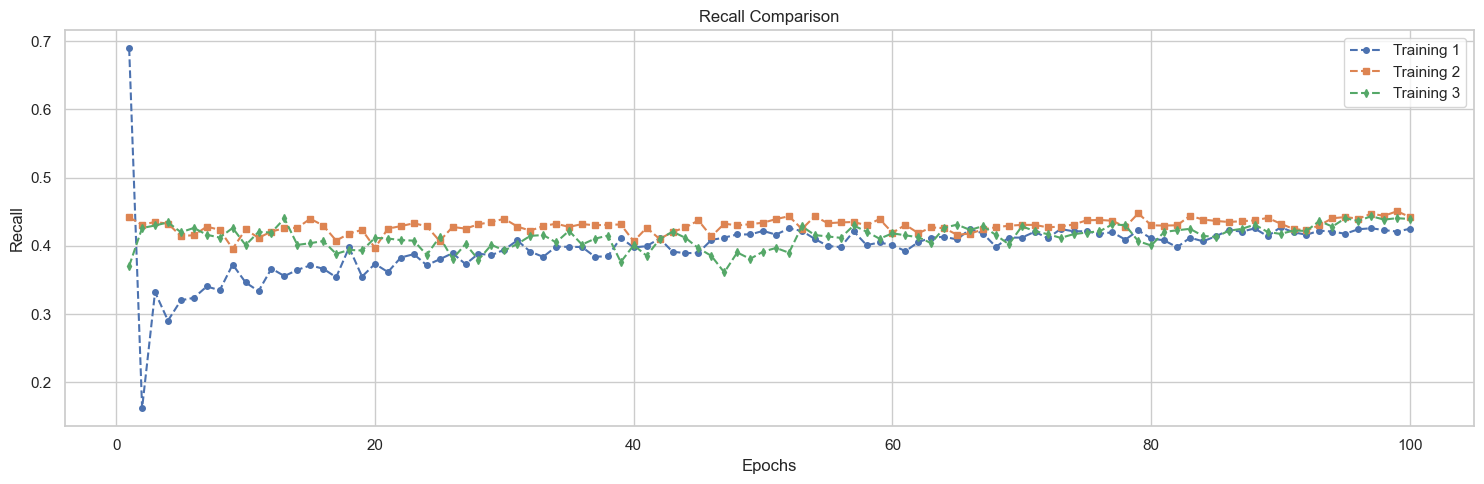

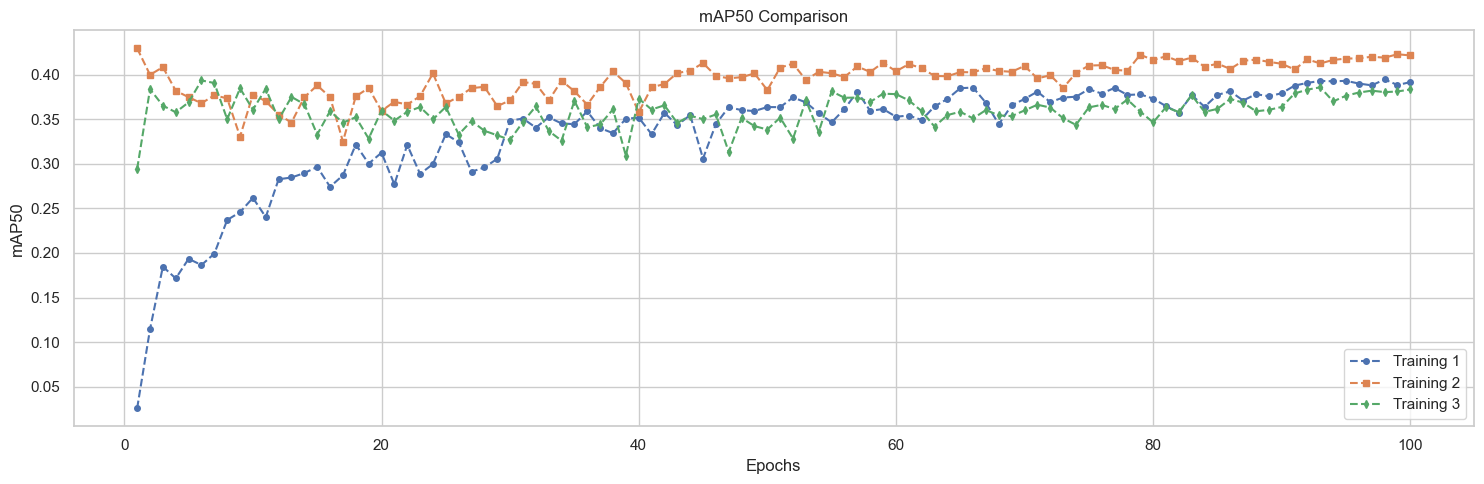

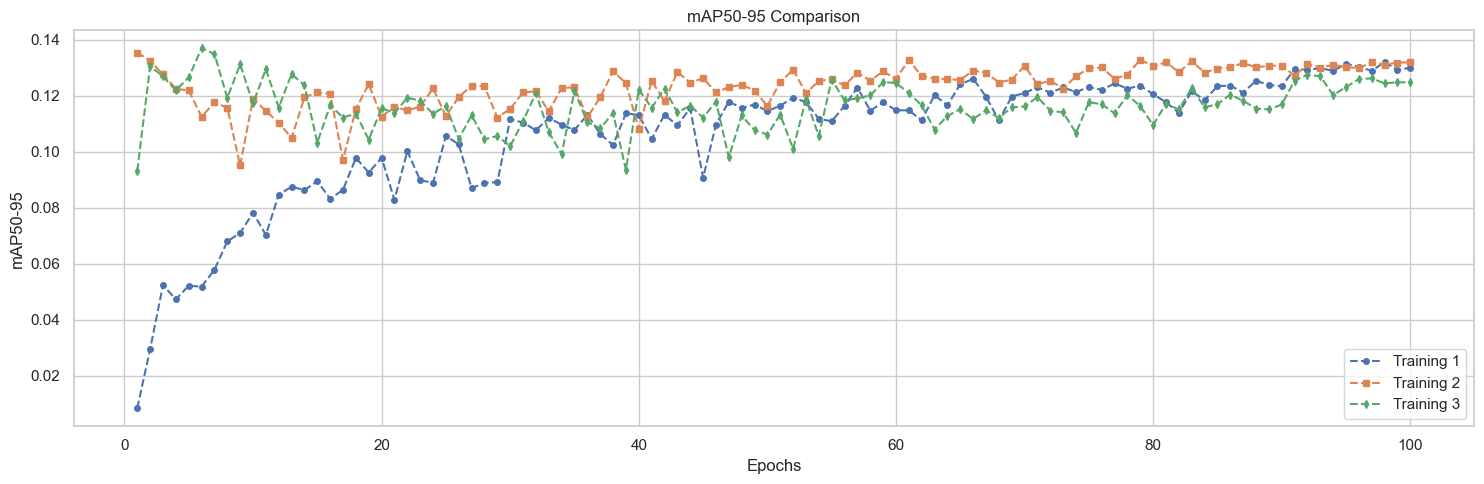

In [29]:
# Plot Performance Metrics
plot_metric("metrics/precision(B)", "Precision", "Precision Comparison")
plot_metric("metrics/recall(B)", "Recall", "Recall Comparison")
plot_metric("metrics/mAP50(B)", "mAP50", "mAP50 Comparison")
plot_metric("metrics/mAP50-95(B)", "mAP50-95", "mAP50-95 Comparison")

### Learning Rate

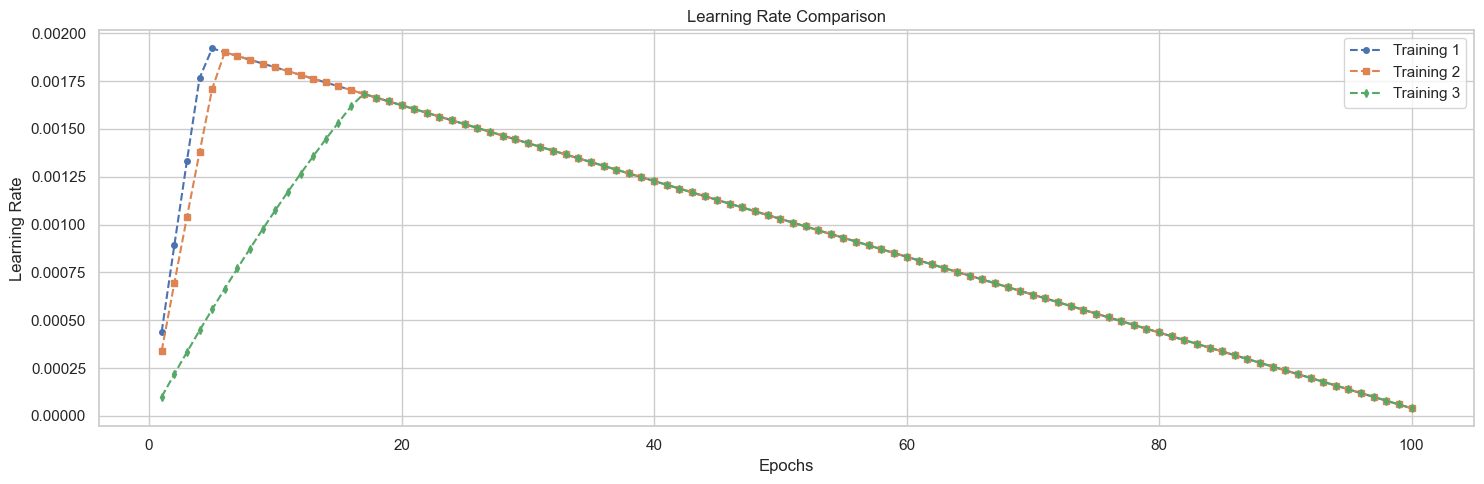

In [28]:
# Plot Learning Rate
plot_metric("lr/pg0", "Learning Rate", "Learning Rate Comparison")

## Resumen de los Experimentos**

| Experimento | Dataset (Size) | Imágenes | Tiles | Tags | Train/Valid (%) | True Positives | False Positives | False Negatives | mAP@0.5 |
|------------|--------------|---------|------|------|----------------|---------------|---------------|---------------|--------|
| **1º TRAIN** | Small & Mid | 6 photos | 2204 | 5472 | 66.6% / 33.3% | 1731 (31.6%) | 1388 (25.4%) | 2353 (43%) | **0.395** |
| **2º TRAIN** | Small | 4 photos | 1472 | 2632 | 75% / 25% | 900 (34.2%) | 979 (37.2%) | 753 (28.6%) | **0.428** |
| **3º TRAIN** | Mid | 2 photos | 736 | 3890 | 50% / 50% | 1201 (30.9%) | 1459 (37.5%) | 1230 (31.6%) | **0.393** |

# **Comparación de los Entrenamientos y Conclusiones**


## **2️⃣ Análisis del Dataset**
- **Cantidad de imágenes y etiquetas**:  
  - El **primer entrenamiento** tiene el mayor número de imágenes y etiquetas, lo que podría ayudar a la generalización del modelo.
  - El **segundo experimento** tiene la menor cantidad de etiquetas, lo que podría influir en el aumento de falsos positivos.
  - El **tercer experimento** tiene un dataset con menos imágenes pero más etiquetas por imagen, lo que puede llevar a un sesgo hacia ciertos tipos de muestras.

- **Distribución de Train/Valid**:  
  - En el **segundo entrenamiento**, la distribución de entrenamiento (75%) es mayor que en los otros dos. Esto suele ayudar a que el modelo aprenda más de los datos disponibles, pero puede afectar la evaluación de la validación.  
  - El **tercer entrenamiento** usa una distribución 50%/50%, lo que proporciona más datos para validar, pero también reduce la cantidad de datos de entrenamiento.  

- **Tamaño de imágenes (small vs mid)**:  
  - El **segundo entrenamiento** usa solo imágenes pequeñas, lo que puede afectar la capacidad del modelo para detectar objetos de mayor tamaño.  
  - El **tercer entrenamiento** usa solo imágenes medianas, lo que puede sesgar el modelo hacia detectar mejor esos tamaños y reducir su generalización.  
  - El **primer entrenamiento** combina ambos tamaños, lo que puede ser más beneficioso para la generalización del modelo.  

## **3️⃣ Análisis de los Hiperparámetros**
- **Modelo (yolov8n)**: Se mantuvo constante en todos los entrenamientos, lo que permite una comparación justa.  
- **Epochs (100)**: En los tres experimentos, el modelo parece alcanzar su rendimiento máximo antes de completar todas las épocas, lo que podría indicar que no se necesita entrenar tantas iteraciones.  
- **Batch Size (64)**: Se mantiene igual en todos los experimentos.  
- **Freeze (10)**: Congelar los primeros 10 capas del modelo en los tres entrenamientos podría estar limitando la capacidad de ajuste en las primeras etapas.  

## **4️⃣ Análisis de Resultados**
### **Métricas Generales**
- **Precisión (Precision) y Recall**:  
  - La **precisión es alta** en los tres experimentos, pero el recall varía, indicando que el modelo tiene problemas detectando todas las instancias correctamente.  
  - En el **segundo experimento**, la relación precisión-recall es mejor que en los otros dos.  

- **mAP50**:  
  - El **segundo experimento tiene el mejor mAP50 (0.428)**, mientras que los otros dos rondan los **0.393 - 0.395**.  
  - El hecho de que **ninguno supere 0.5** indica que el modelo aún tiene margen de mejora en la detección de bounding boxes y clasificación.  

- **Confusión entre clases (False Positives y False Negatives)**:  
  - El **segundo experimento** tiene **menos falsos negativos (28.6%)**, lo que indica que detecta más objetos correctamente.  
  - Sin embargo, también tiene **más falsos positivos (37.2%)**, lo que sugiere que está etiquetando erróneamente más objetos como plantas o malezas.  
  - El **primer experimento tiene la mayor cantidad de falsos negativos (43%)**, lo que significa que muchas instancias no se están detectando.  

## **5️⃣ Conclusiones Generales**
1. **El segundo entrenamiento ofrece el mejor balance entre precisión y recall**, aunque todavía presenta problemas con los falsos positivos.  
2. **El primer entrenamiento tiene la mayor cantidad de datos**, pero su desempeño no es significativamente mejor, lo que sugiere que la diversidad del dataset o la estrategia de entrenamiento podrían estar afectando la calidad del modelo.  
3. **El tercer entrenamiento tiene una distribución 50/50 de Train/Valid**, lo que proporciona una mejor validación pero menos datos de entrenamiento, lo que podría estar limitando su rendimiento.  
4. **Los falsos negativos siguen siendo un problema en todos los modelos**, lo que indica que el modelo podría estar siendo demasiado conservador en sus predicciones.  
5. **El mAP50-95 sigue siendo bajo en todos los casos**, lo que sugiere que el modelo no está generalizando bien en diferentes escalas de los objetos.  

---

# **Sugerencias para Próximos Entrenamientos**
### **1️⃣ Dataset**
- **Aumentar la diversidad** de las imágenes usadas en el entrenamiento para mejorar la generalización.  
- **Incluir más imágenes de diferentes tamaños** (small y mid en conjunto) para mejorar la detección en distintos escenarios.  
- **Balancear mejor la cantidad de etiquetas** entre entrenamiento y validación para evitar sesgos en la evaluación.  
- **Aumentar la cantidad de imágenes para el tercer experimento**, ya que el menor número de imágenes podría estar limitando su capacidad de aprendizaje.  

### **2️⃣ Hiperparámetros**
- **Reducir el número de épocas** (por ejemplo, probar con 50-75 épocas) para evitar sobreajuste si las métricas dejan de mejorar antes de las 100 épocas.  
- **Ajustar el número de capas congeladas (`freeze`)**, probando con un valor menor (por ejemplo, `freeze=5`) para permitir que más capas del modelo se ajusten a los datos específicos.  
- **Experimentar con un batch size más pequeño o mayor**, dependiendo de la estabilidad de la convergencia en la pérdida.  

### **3️⃣ Optimización del Modelo**
- **Evaluar otras variantes de YOLOv8**, como `yolov8s` o `yolov8m`, para comparar si modelos más grandes pueden mejorar los resultados sin sacrificar eficiencia.  
- **Ajustar la tasa de aprendizaje (`learning rate`)** con una estrategia como el Cosine Annealing para mejorar la estabilidad durante el entrenamiento.  
- **Aplicar técnicas de Data Augmentation**, como rotaciones, cambios de brillo y contraste, para mejorar la robustez del modelo.  

### **4️⃣ Evaluación y Métricas**
- **Analizar casos de falsos negativos y positivos** con visualización de predicciones para entender patrones de error.  
- **Evaluar otras métricas**, como la **IoU media**, para entender mejor los problemas en la localización de objetos.  

---

# **Conclusión Final**
El segundo entrenamiento logró el mejor mAP50, pero aún hay margen de mejora en la reducción de falsos positivos y negativos. Para mejorar el modelo en próximos experimentos, es clave optimizar la distribución de los datos, ajustar los hiperparámetros y considerar modelos más robustos.